In [17]:
import pandas as pd
data = pd.read_excel("https://github.com/nadiinchi/intro_sklearn/blob/master/boston_houses.xlsx?raw=true")

/Users/nadiinchi/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [18]:
data.head()

,crim_rate,zn,business,river,nit_oxiden,rooms,age,dist,highways_index,tax,pup_per_teaс,lower,target
0,0.000000,0.18,0.067815,0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,0.089680,24.0
1,0.000236,0.00,0.242302,0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,0.204470,21.6
2,0.000236,0.00,0.242302,0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.063466,34.7
3,0.000293,0.00,0.063050,0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.033389,33.4
4,0.000705,0.00,0.063050,0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,0.099338,36.2


In [31]:
X = data[data.columns[:-1]]
y = data["target"]

from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3)

In [27]:
X_tr.shape, X_te.shape, y_tr.shape, y_te.shape

((354, 12), (152, 12), (354,), (152,))

Задача:
    
* обучение, предсказание, качество - с к по умолчанию

* попробовать k от 1 до 20 и построить график качества на обучении и качества на тесте

In [21]:
KNeighborsRegressor(n_neighbors=5)

from matplotlib import pyplot as plt
%matplotlib inline

#plt.plot(xs, ys)
#plt.xlabel("подпись икс") # ylabel

In [35]:
# Следующая задача
class MyNormalizer:
    def fit(self, X):
        # считает статистики по столбцам и сохраняет
        self.means = X.mean(axis=0)
        self.stds = X.std(axis=0)
        
    def transform(self, X):
        # трансформирует данные, используя ранее сохраненные статистики
        X_new = (X - self.means[None, :]) / self.stds[None, :]
        return X_new
        
# Numpy: np.mean, np.std, np.min, np.max, / *, axis=

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

In [ ]:
model = KNeighborsRegressor()
model.fit(X_tr, y_tr)
preds_tr = model.predict(X_tr)
preds_te = model.predict(X_te)
tr_err = mean_absolute_error(y_tr, preds_tr)
te_err = mean_absolute_error(y_te, preds_te)
print(tr_err, te_err)

In [32]:
def do_all(k=5):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_tr, y_tr)
    preds_tr = model.predict(X_tr)
    preds_te = model.predict(X_te)
    tr_err = mean_absolute_error(y_tr, preds_tr)
    te_err = mean_absolute_error(y_te, preds_te)
    return tr_err, te_err

In [33]:
tr_errs = []
te_errs = []
ks = []
for k in range(1, 21):
    tr_err, te_err = do_all(k)
    tr_errs.append(tr_err)
    te_errs.append(te_err)
    ks.append(k)

Text(0, 0.5, 'Error')

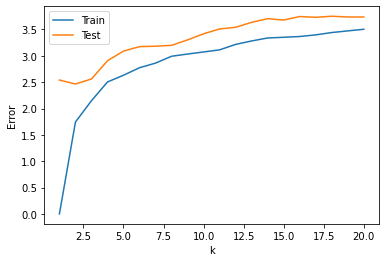

In [34]:
plt.plot(ks, tr_errs, label="Train")
plt.plot(ks, te_errs, label="Test")
plt.legend()
plt.xlabel("k")
plt.ylabel("Error")